<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Machine-Learning/covid-19-outcome-prediction/COVID_19_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing generally needed libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# 2. Reading the data and exploring its structure

Reading the data from the CSV file

In [ ]:
df = pd.read_csv("/content/data.csv")

Using different df methods and functions to learn more about the dataset

In [ ]:
df.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
df.shape #returns a tuple (rows, columns)

(863, 15)

In [ ]:
df.head(6)
# we notice that there is an index column at the beginning of the table with no column name so we will remove it (irrelevant)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [ ]:
df2 = df.iloc[:,1:] #to remove first column from data as its just an index with no header
df2.head(6) # making sure removal is correct

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [ ]:
df2.shape

(863, 14)

In [ ]:
# printing different information about the data such as the datatype, features names, if there are any nulls ... etc
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB
None


Plotting the result whether recovered or not vs the number of patients

Text(0, 0.5, 'Patients Count')

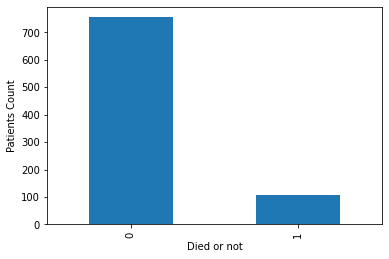

In [ ]:
plt = df2.result.value_counts().plot(kind = 'bar')
plt.set_xlabel('Died or not')
plt.set_ylabel('Patients Count')

Plotting the patients number per gender

Text(0, 0.5, 'Patients Count')

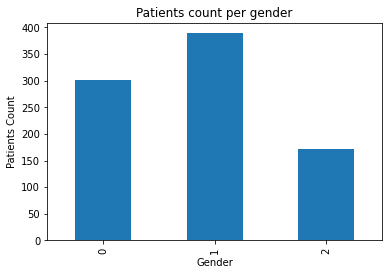

In [ ]:
plt = df2.gender.value_counts().sort_index().plot(kind='bar', title='Patients count per gender')
plt.set_xlabel('Gender')
plt.set_ylabel('Patients Count')

Plotting the death probability across genders

Text(0, 0.5, 'Death Probability')

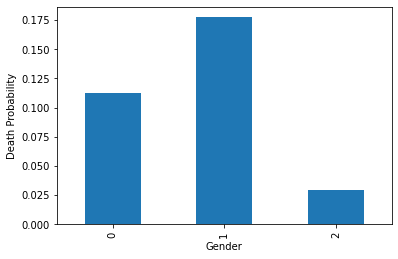

In [ ]:
#plt = (1-(df2[['gender', 'result']].groupby('gender').mean())).result.plot(kind='bar') # recovering probability
plt = df2[['gender', 'result']].groupby('gender').mean().result.plot(kind='bar')

plt.set_xlabel('Gender')
plt.set_ylabel('Death Probability')

Plotting the death probability vs age irrespective of the gender

Text(0, 0.5, 'Death Probability')

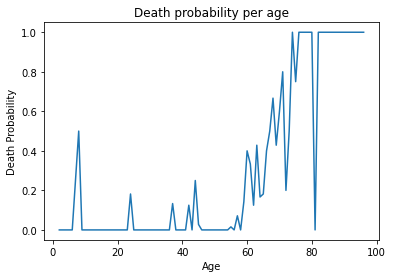

In [ ]:
plt = df2[['age', 'result']].groupby('age').mean().result.plot(kind='line', title='Death probability per age')

plt.set_xlabel('Age')
plt.set_ylabel('Death Probability')

* Plotting pairwise correlation between features
* The first initial thought was to remove uncorrelated features with the "result" target label to simplify the model but it was noticed that the majority of features are categorical and therefore correlation methods used by below method on the dataframe are not very representitive as they should measure the correlation between continuous numeric values.
* The plot was left to show that there is positive correlation between the death probability and the patient's age as was already noticed from the previous plot

<AxesSubplot:>

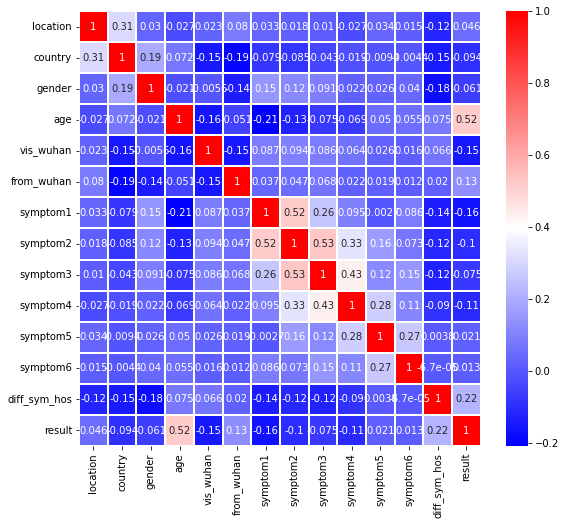

In [ ]:
# plotting pairwise correlation between features
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = df2.corr(),cmap='bwr', annot=True, linewidths=0.2)

# 3. Slicing that data into training and testing datasets and separating the features from labels

Separating the features matrix from the target label vector

In [ ]:
#feature matrix
X = df2.iloc[:,:-1] # or df2.drop(columns='result', axis=1).copy

#Traget label
y = df2['result'] # or df2.result.values


Creating Training and Testing datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=0)
#80% training, 20% testing

In [ ]:
print("Training data shape:",X_train.shape)
print("Testing data shape",X_test.shape)
print("Training labels shape",y_train.shape)
print("Testing labels shape",y_test.shape)

Training data shape: (690, 13)
Testing data shape (173, 13)
Training labels shape (690,)
Testing labels shape (173,)


#4. Defining some plotting functions that will be called for different models performance visualization

Defining a function to return and print the model classification metrics such as Accuracy, Recall, Precision and F1 score.

In [ ]:
def print_model_metrics(y_test, y_pred):
    ''' - Two parameters are given, the true label (y_test) and predicted labels (y_pred)
    - Four metircs are returned in the following order: Accuracy, Recall, Precision and F1 score.
    - The function also prints these metrics'''

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Model accuracy is: {0:.2f}".format(acc))
    print("Model recall is: {0:.2f}".format(recall))
    print("Model precision is: {0:.2f}".format(prec))
    print("Model F1 score is: {0:.2f}".format(f1))

    return acc, recall, prec, f1


Defining a function to plot the confusion matrix of the model.

In [ ]:
def confusion_matrix_plot(y_test, y_pred, model_acc, model_name):
    ''' - Four parameters are given, the true label (y_test) and predicted labels (y_pred) and your model accuracy and your model name as a string
    - The function will plot the confusion matrix for the passed true/predicted labels'''

    from sklearn import metrics
    import matplotlib.pyplot as plt

    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plot_title = ' {0} Accuracy: {1:.2f}'.format(model_name, model_acc)
    plt.title(plot_title, size = 15);

Defining a function to plot the ROC curve of the model VS the perfect and random classifiers as well as calculating AUC.

In [ ]:
def roc_curve_plot(y_test, y_pred, model_name):
    ''' - Three parameters are given, the true label (y_test) and predicted labels (y_pred) amd your model name as string
    - Four values are returned in the following order: FPR, TPR, Thresholds and AUC.
    - The function will also print the ROC curve'''

    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.figure(figsize=(8,6))
    title_label = '{0} ROC curve with an AUC: {1:.2f}'.format(model_name, auc)
    plt.plot(fpr, tpr,'r-',label = model_name)
    plt.plot([0,1],[0,1],'k', linestyle='dotted', label='random')
    plt.plot([0,0,1,1],[0,1,1,1],'g', linestyle='dotted', label='perfect')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title_label)
    plt.show()

    return fpr, tpr, thresholds, auc

#5. Models Building

####5.1 * Defining the scoring variable that will be used to optimize the models performance during the hyperparameter search.
#### * We will choose to select hyperparameters that result in the best recall as recall is more important for the current dataset where we are predicting if a patient will die or not.
#### * It is important to not miss any patient that is predicted to die such that him/her can be given a more focused care to prevent this, than say using precision or accuracy as we can tolerate having some FPR (being predicted to die but doesn't end up being a severe case).

In [ ]:
scoring_metric = "recall"

##5.2 **K-Nearest Neighbors "KNN"**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1,20),
          "weights": ("uniform", "distance")}
knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring=scoring_metric, cv=10)
knn_grid.fit(X_train, y_train)

print("Best number of neighbors K is:", knn_grid.best_estimator_.n_neighbors,\
      ", using weights parameter set to:", knn_grid.best_estimator_.weights, ", with recall of:", knn_grid.best_score_)


Best number of neighbors K is: 7 , using weights parameter set to: distance , with recall of: 0.7500000000000001


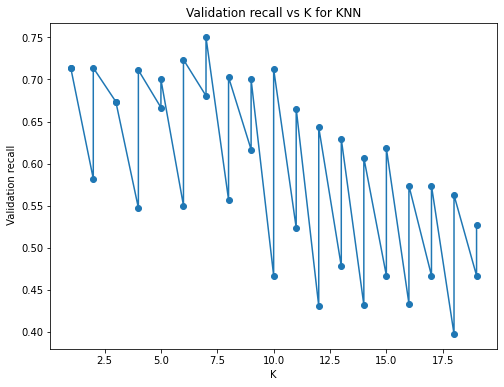

In [ ]:
# plotting the validation recall vs different Ks

knn_scores = knn_grid.cv_results_['mean_test_score']
knn_ks = knn_grid.cv_results_['param_n_neighbors'].data

plt.figure(figsize=(8,6))
plt.plot(knn_ks, knn_scores,'-o')
plt.xlabel('K')
plt.ylabel(' Validation recall')
plt.title('Validation recall vs K for KNN')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Prediction
y_pred_knn = knn_grid.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.76      0.59      0.67        22

    accuracy                           0.92       173
   macro avg       0.85      0.78      0.81       173
weighted avg       0.92      0.92      0.92       173



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data
knn_acc, knn_recall, knn_prec, knn_f1 = print_model_metrics(y_test, y_pred_knn)

Model accuracy is: 0.92
Model recall is: 0.59
Model precision is: 0.76
Model F1 score is: 0.67


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for training data
y_pred_knn_train = knn_grid.predict(X_train)
knn_acc_train, knn_recall_train, knn_prec_train, knn_f1_train = print_model_metrics(y_train, y_pred_knn_train)

Model accuracy is: 1.00
Model recall is: 1.00
Model precision is: 1.00
Model F1 score is: 1.00


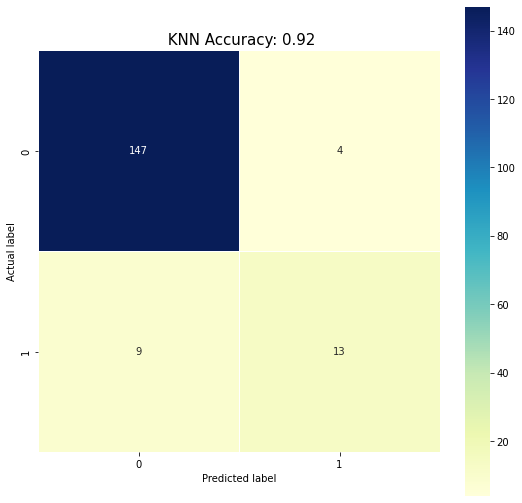

In [ ]:
# Plotting the confusion matrix using the previously defined function "confusion_matrix_plot" at section 4.
confusion_matrix_plot(y_test, y_pred_knn, knn_acc, "KNN")

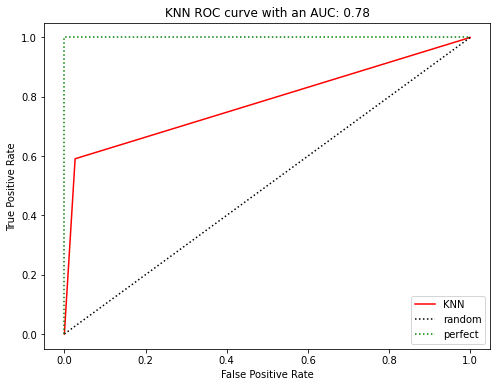

In [ ]:
# Plotting the ROC curve using the previously defined function "roc_curve_plot" at section 4.
knn_fpr, knn_tpr, knn_thresholds, knn_auc = roc_curve_plot(y_test, y_pred_knn, "KNN")

##5.3 **Logistic Regression**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight = "balanced", max_iter = 10000)
params = {"solver": ("lbfgs", "liblinear", "newton-cg", "sag", "saga")}
logreg_grid = GridSearchCV(estimator=logreg, param_grid=params, scoring=scoring_metric, cv=10)
logreg_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'solver': ('lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga')},
             scoring='recall')

In [ ]:
# Printing best hyperparameter (in this model we jsut searched for best solver)
logreg_grid.best_params_

{'solver': 'lbfgs'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" at section 5.1
logreg_grid.best_score_

0.9305555555555556

In [ ]:
# Prediction
y_pred_logreg = logreg_grid.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       151
           1       0.60      0.95      0.74        22

    accuracy                           0.91       173
   macro avg       0.80      0.93      0.84       173
weighted avg       0.94      0.91      0.92       173



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
logreg_acc, logreg_recall, logreg_prec, logreg_f1 = print_model_metrics(y_test, y_pred_logreg)

Model accuracy is: 0.91
Model recall is: 0.95
Model precision is: 0.60
Model F1 score is: 0.74


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for training data.
y_pred_logreg_train = logreg_grid.predict(X_train)
logreg_acc_train, logreg_recall_train, logreg_prec_train, logreg_f1_train = print_model_metrics(y_train, y_pred_logreg_train)

Model accuracy is: 0.92
Model recall is: 0.95
Model precision is: 0.61
Model F1 score is: 0.74


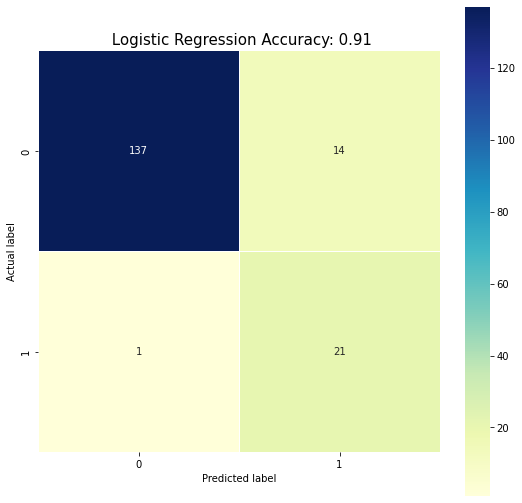

In [ ]:
# Plotting the confusion matrix using the previously defined function "confusion_matrix_plot" at section 4.
confusion_matrix_plot(y_test, y_pred_logreg, logreg_acc, "Logistic Regression")

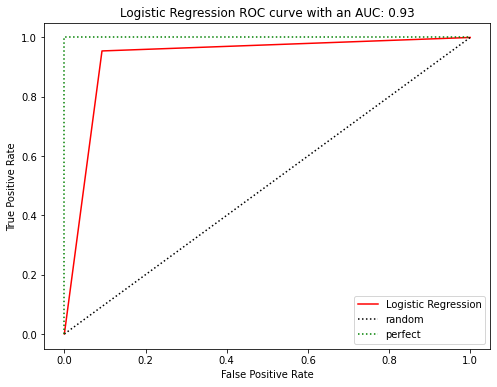

In [ ]:
# Plotting the ROC curve using the previously defined function "roc_curve_plot" at section 4.
logreg_fpr, logreg_tpr, logreg_thresholds, logreg_auc = roc_curve_plot(y_test, y_pred_logreg, "Logistic Regression")

##5.4 **Naïve Bayes**


In [ ]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

NB = GaussianNB()
NB.fit(X_train, y_train)

# Prediction
y_pred_NB = NB.predict(X_test)

print(classification_report(y_test, y_pred_NB))


              precision    recall  f1-score   support

           0       0.95      0.25      0.40       151
           1       0.15      0.91      0.26        22

    accuracy                           0.34       173
   macro avg       0.55      0.58      0.33       173
weighted avg       0.85      0.34      0.38       173



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
NB_acc, NB_recall, NB_prec, NB_f1 = print_model_metrics(y_test, y_pred_NB)

Model accuracy is: 0.34
Model recall is: 0.91
Model precision is: 0.15
Model F1 score is: 0.26


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for training data.
y_pred_NB_train = NB.predict(X_train)
NB_acc_train, NB_recall_train, NB_prec_train, NB_f1_train = print_model_metrics(y_train, y_pred_NB_train)

Model accuracy is: 0.31
Model recall is: 0.97
Model precision is: 0.15
Model F1 score is: 0.26


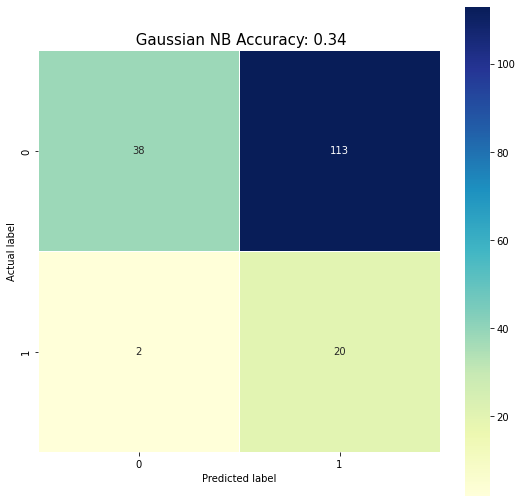

In [ ]:
# Plotting the confusion matrix using the previously defined function "confusion_matrix_plot" at section 4.
confusion_matrix_plot(y_test, y_pred_NB, NB_acc, "Gaussian NB")

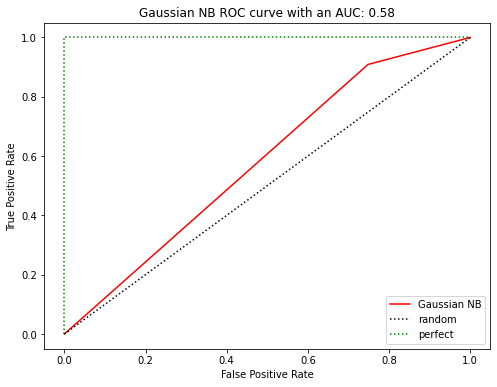

In [ ]:
# Plotting the ROC curve using the previously defined function "roc_curve_plot" at section 4.
NB_fpr, NB_tpr, NB_thresholds, NB_auc = roc_curve_plot(y_test, y_pred_NB, "Gaussian NB")

##5.5 **Decision tree Classifier**



In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_clf = tree.DecisionTreeClassifier(class_weight = "balanced", random_state=1)

params = {"criterion": ("gini", "entropy"),
          "splitter": ("best", "random"),
          "min_samples_split":np.arange(2,25),
          "min_samples_leaf":np.arange(2,25),
          "max_features": ("sqrt", "log2", None)}
tree_clf_grid = GridSearchCV(estimator=tree_clf, param_grid=params, scoring=scoring_metric, cv=10)

tree_clf_grid.fit(X_train, y_train)
#tree.plot_tree(tree_clf_grid)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 'log2', None),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'splitter': ('best', 'random')},
             scoring='recall')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
tree_clf_grid.best_params_

#tree_clf_grid.best_estimator_ can also be used

{'criterion': 'gini',
 'max_features': None,
 'min_samples_leaf': 17,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" at section 5.1
tree_clf_grid.best_score_

0.9541666666666668

In [ ]:
# Prediction
y_pred_tree = tree_clf_grid.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96       151
           1       0.63      1.00      0.77        22

    accuracy                           0.92       173
   macro avg       0.81      0.96      0.86       173
weighted avg       0.95      0.92      0.93       173



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
tree_acc, tree_recall, tree_prec, tree_f1 = print_model_metrics(y_test, y_pred_tree)

Model accuracy is: 0.92
Model recall is: 1.00
Model precision is: 0.63
Model F1 score is: 0.77


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for taining data.
y_pred_tree_train = tree_clf_grid.predict(X_train)
tree_acc_train, tree_recall_train, tree_prec_train, tree_f1_train = print_model_metrics(y_train, y_pred_tree_train)

Model accuracy is: 0.92
Model recall is: 0.98
Model precision is: 0.61
Model F1 score is: 0.75


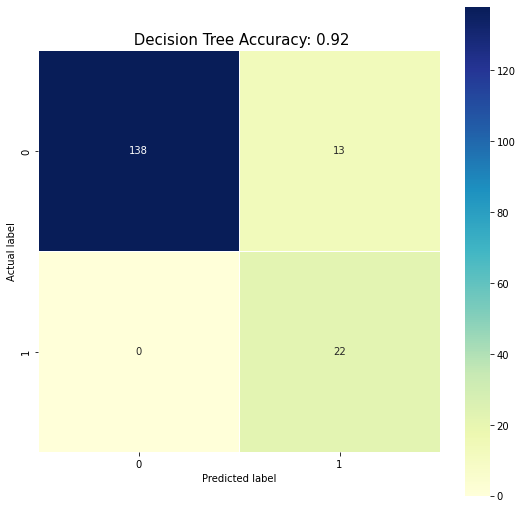

In [ ]:
# Plotting the confusion matrix using the previously defined function "confusion_matrix_plot" at section 4.
confusion_matrix_plot(y_test, y_pred_tree, tree_acc, "Decision Tree")

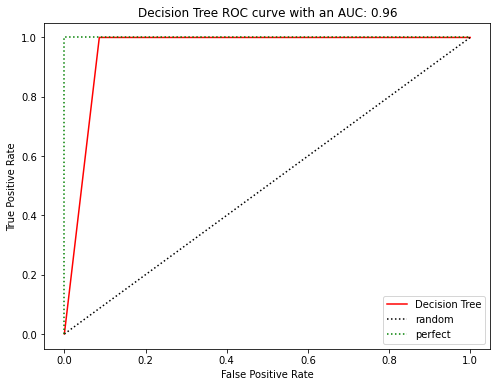

In [ ]:
# Plotting the ROC curve using the previously defined function "roc_curve_plot" at section 4.
tree_fpr, tree_tpr, tree_thresholds, tree_auc = roc_curve_plot(y_test, y_pred_tree, "Decision Tree")

Plotting the decision tree

In [ ]:
# installing needed packages to plot and downlaod the decision tree image
!pip install graphviz
!pip install pydotplus
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


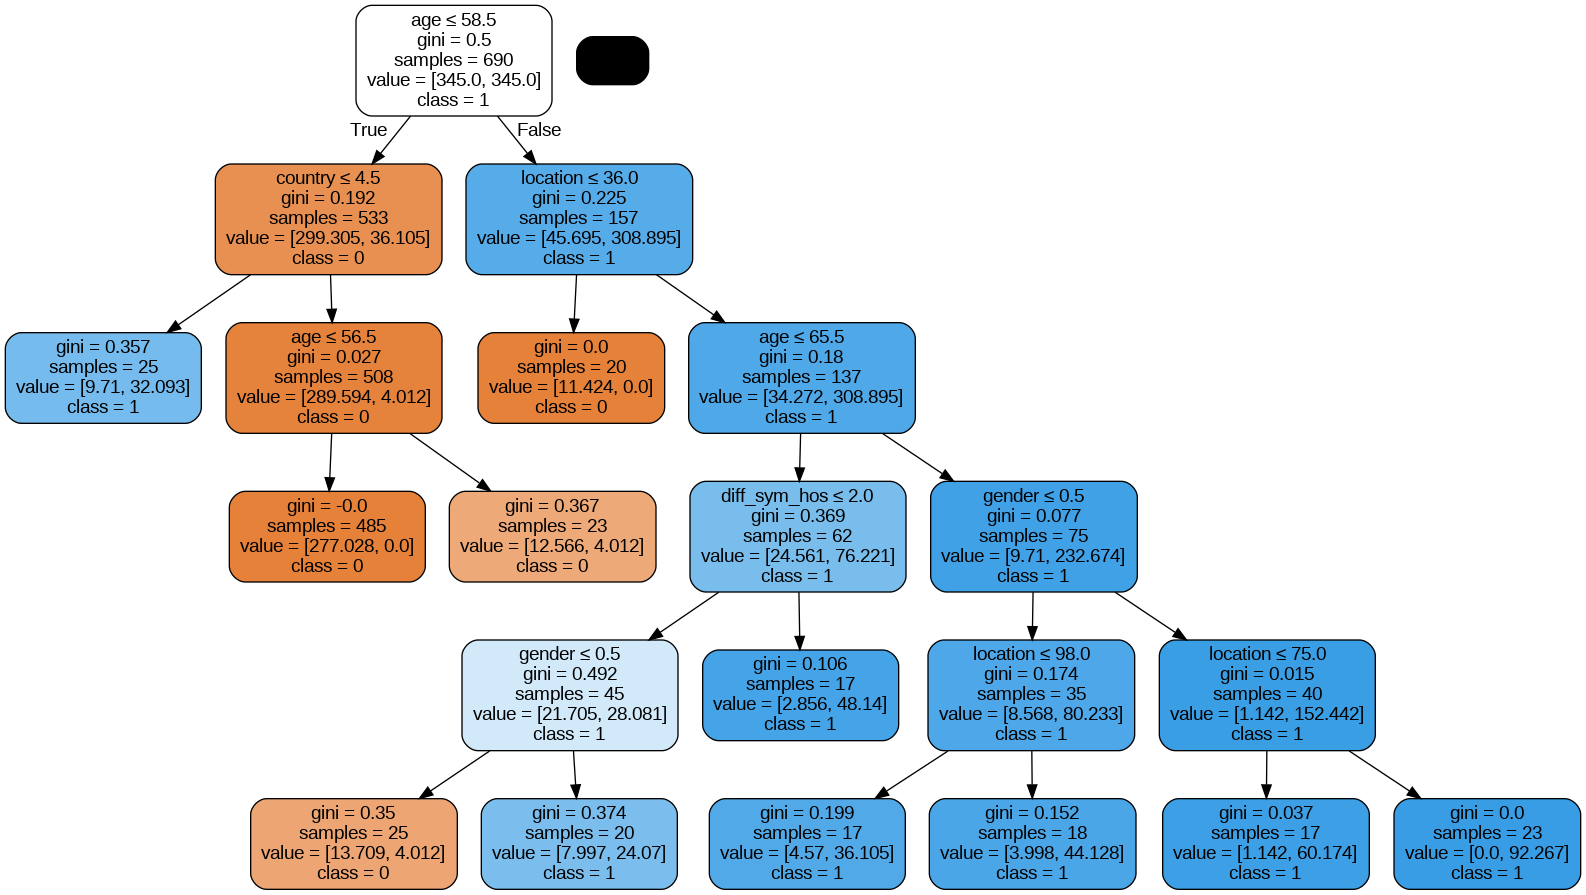

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf_grid.best_estimator_, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('coronavis.png')
Image(graph.create_png())

##5.6 **Support Vector Machines (SVC)**



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(class_weight = "balanced")

params = {"kernel": ("linear", "rbf", "poly", "sigmoid"),
          "gamma": ("scale", "auto"),
          "coef0": [0, 0.1, 1, 10],
          "degree": [3,4,5,6]}
svm_grid = GridSearchCV(estimator=svm_model, param_grid=params, scoring=scoring_metric, cv=10)

svm_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'coef0': [0, 0.1, 1, 10], 'degree': [3, 4, 5, 6],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='recall')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
svm_grid.best_params_

{'coef0': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" at section 5.1
svm_grid.best_score_

0.9444444444444444

In [ ]:
# Prediction
y_pred_svm = svm_grid.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       151
           1       0.70      0.86      0.78        22

    accuracy                           0.94       173
   macro avg       0.84      0.91      0.87       173
weighted avg       0.94      0.94      0.94       173



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
svm_acc, svm_recall, svm_prec, svm_f1 = print_model_metrics(y_test, y_pred_svm)

Model accuracy is: 0.94
Model recall is: 0.86
Model precision is: 0.70
Model F1 score is: 0.78


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for training data.
y_pred_svm_train = svm_grid.predict(X_train)
svm_acc_train, svm_recall_train, svm_prec_train, svm_f1_train = print_model_metrics(y_train, y_pred_svm_train)

Model accuracy is: 0.96
Model recall is: 0.99
Model precision is: 0.76
Model F1 score is: 0.86


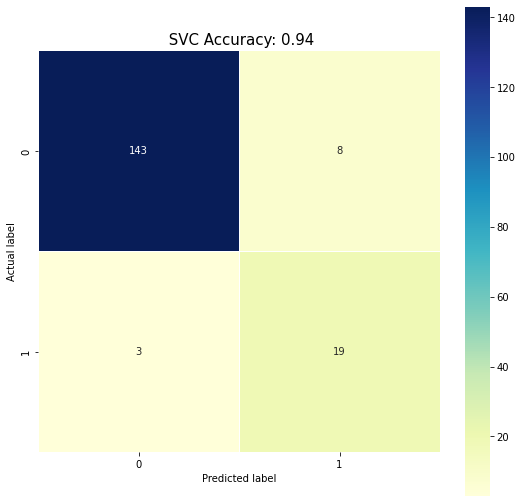

In [ ]:
# Plotting the confusion matrix using the previously defined function "confusion_matrix_plot" at section 4.
confusion_matrix_plot(y_test, y_pred_svm, svm_acc, "SVC")

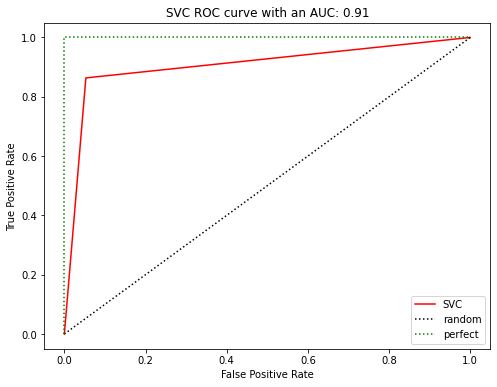

In [ ]:
# Plotting the ROC curve using the previously defined function "roc_curve_plot" at section 4.
svm_fpr, svm_tpr, svm_thresholds, svm_auc = roc_curve_plot(y_test, y_pred_svm, "SVC")

#6.Different Models Comparison

## 6.1 Plotting the recall score for different evaulated models on the validation data

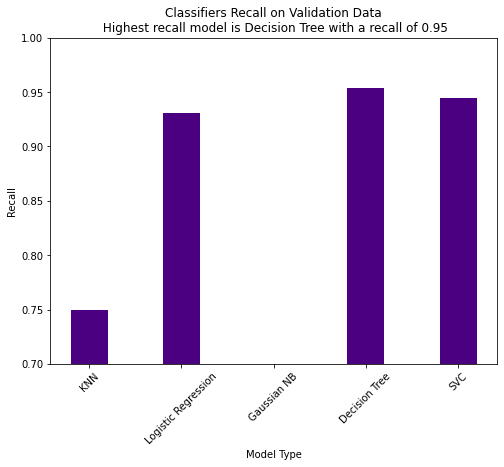

In [ ]:
best_validation_recall_scores = np.array([knn_grid.best_score_, logreg_grid.best_score_, 0, tree_clf_grid.best_score_, svm_grid.best_score_]) #Gaussian NB validation recall is set to 0 as it wasnt calculated
models_name = np.array(["KNN", "Logistic Regression", "Gaussian NB", "Decision Tree", "SVC"])

max_valrecall_index = np.argmax(best_validation_recall_scores) # getting the index of the highest validation recall
max_valrecall = best_validation_recall_scores[max_valrecall_index] # getting the highest validation recall value
max_valrecall_model = models_name[max_valrecall_index] # getting the model of the highest validation recall

plt.figure(figsize=(8,6))
plt.bar(models_name, best_validation_recall_scores, width=0.4, color = 'indigo')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("Recall")
plt.ylim(0.7, 1)
title = 'Classifiers Recall on Validation Data\n Highest recall model is {0} with a recall of {1:.2f}'.format(max_valrecall_model, max_valrecall)
plt.title(title)
plt.show()

## 6.2 Plotting the ROC for the different evaluated models

<ipython-input-60-4f6863243e60>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "y-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'y-',linestyle='dotted',label='random')


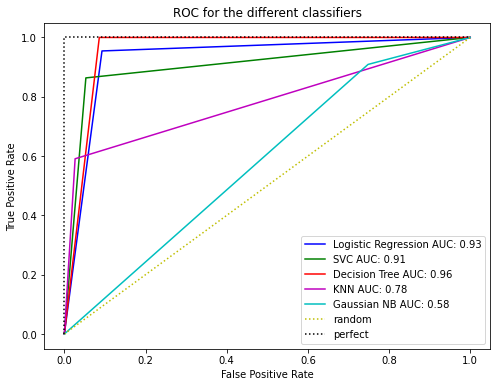

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(logreg_fpr, logreg_tpr,'b-',label = 'Logistic Regression AUC: %.2f'%logreg_auc)
plt.plot(svm_fpr, svm_tpr,'g-',label = 'SVC AUC: %.2f'%svm_auc)
plt.plot(tree_fpr, tree_tpr,'r-',label = 'Decision Tree AUC: %.2f'%tree_auc)
plt.plot(knn_fpr, knn_tpr,'m-',label = 'KNN AUC: %.2f'%knn_auc)
plt.plot(NB_fpr, NB_tpr,'c-',label = 'Gaussian NB AUC: %.2f'%NB_auc)


plt.plot([0,1],[0,1],'y-',linestyle='dotted',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'k',linestyle='dotted',label='perfect')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for the different classifiers')
plt.show()

##6.3 Plotting different metrics for all models at once for a quick comparison

In [ ]:
# Creating a list for each metric
models_name = ["KNN", "Logistic Regression", "Gaussian NB", "Decision Tree", "SVC"]
models_acc = [knn_acc, logreg_acc, NB_acc, tree_acc, svm_acc]
models_recall = [knn_recall, logreg_recall, NB_recall, tree_recall, svm_recall]
models_prec = [knn_prec, logreg_prec, NB_prec, tree_prec, svm_prec]
models_f1 = [knn_f1, logreg_f1, NB_f1, tree_f1, svm_f1]
models_auc = [knn_auc, logreg_auc, NB_auc, tree_auc, svm_auc]


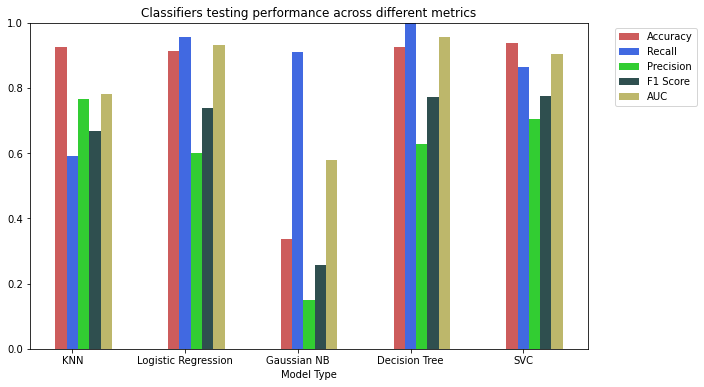

In [ ]:
# Plotting
ind = np.arange(len(models_name))*2
width = 0.2

plt.figure(figsize=(10,6))

plt.bar(ind, models_acc, width=width, label = "Accuracy", color = 'indianred')
plt.bar(ind+width, models_recall, width=width, label = "Recall", color = 'royalblue')
plt.bar(ind+width*2, models_prec, width=width, label = "Precision", color = 'limegreen')
plt.bar(ind+width*3, models_f1, width=width, label = "F1 Score", color = 'darkslategrey')
plt.bar(ind+width*4, models_auc, width=width, label = "AUC", color = 'darkkhaki')

plt.xticks(ind+width, models_name)
plt.xlabel("Model Type")

plt.ylim(0, 1)
plt.title('Classifiers testing performance across different metrics')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()


##6.4 Individual metrics Comparison for each model on the testing data

Accuracy Comparison

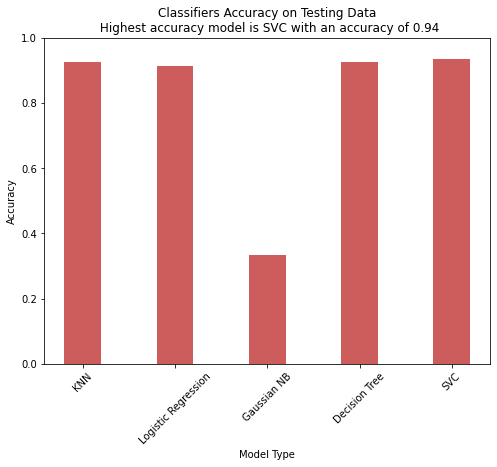

In [ ]:
models_name = np.array(models_name)
models_acc = np.array(models_acc) # converting the list to numpy array

max_acc_index = np.argmax(models_acc) # getting the index of the highest accuracy
max_acc = models_acc[max_acc_index] # getting the highest accuracy value
max_acc_model = models_name[max_acc_index] # getting the model of the highest accuracy

plt.figure(figsize=(8,6))
plt.bar(models_name, models_acc, width=0.4, color = 'indianred')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
title = 'Classifiers Accuracy on Testing Data\n Highest accuracy model is {0} with an accuracy of {1:.2f}'.format(max_acc_model, max_acc)
plt.title(title)
plt.show()

Recall Comaprison

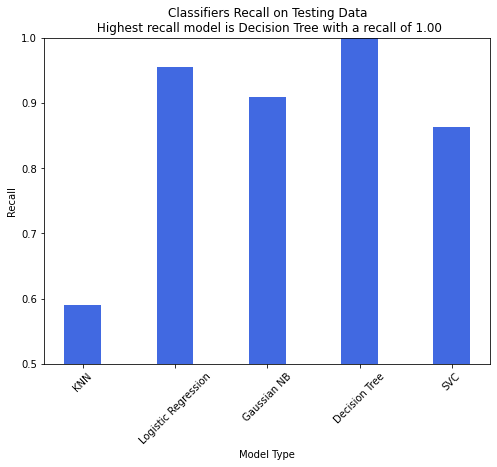

In [ ]:
models_name = np.array(models_name)
models_recall = np.array(models_recall)

max_recall_index = np.argmax(models_recall)
max_recall = models_recall[max_recall_index]
max_recall_model = models_name[max_recall_index]

plt.figure(figsize=(8,6))
plt.bar(models_name, models_recall, width=0.4, color = 'royalblue')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("Recall")
plt.ylim(0.5, 1)
title = 'Classifiers Recall on Testing Data\n Highest recall model is {0} with a recall of {1:.2f}'.format(max_recall_model, max_recall)
plt.title(title)
plt.show()

Precision Comparison

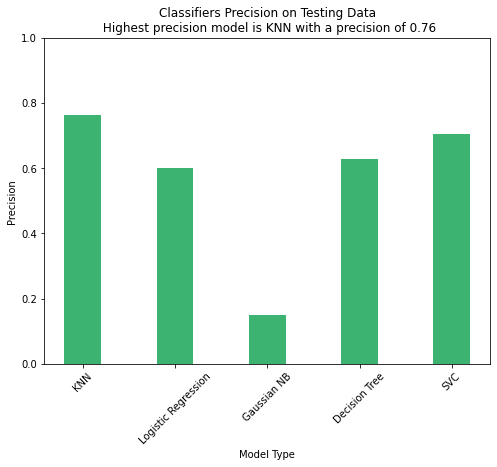

In [ ]:
models_name = np.array(models_name)
models_prec = np.array(models_prec)

max_prec_index = np.argmax(models_prec)
max_prec = models_prec[max_prec_index]
max_prec_model = models_name[max_prec_index]

plt.figure(figsize=(8,6))
plt.bar(models_name, models_prec, width=0.4, color = 'mediumseagreen')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("Precision")
plt.ylim(0, 1)
title = 'Classifiers Precision on Testing Data\n Highest precision model is {0} with a precision of {1:.2f}'.format(max_prec_model, max_prec)
plt.title(title)
plt.show()

F1 Score Comparison

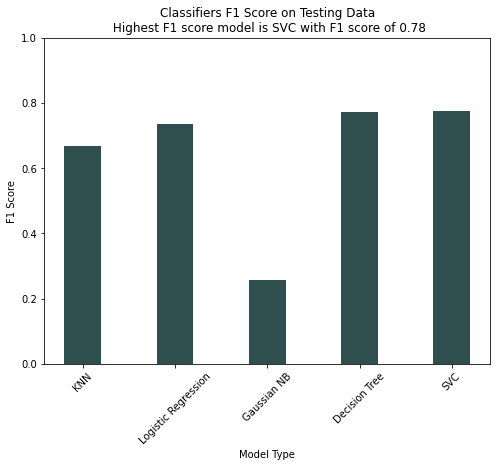

In [ ]:
models_name = np.array(models_name)
models_f1 = np.array(models_f1)

max_f1_index = np.argmax(models_f1)
max_f1 = models_f1[max_f1_index]
max_f1_model = models_name[max_f1_index]

plt.figure(figsize=(8,6))
plt.bar(models_name, models_f1, width=0.4, color = 'darkslategrey')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
title = 'Classifiers F1 Score on Testing Data\n Highest F1 score model is {0} with F1 score of {1:.2f}'.format(max_f1_model, max_f1)
plt.title(title)
plt.show()

AUC Comaprison

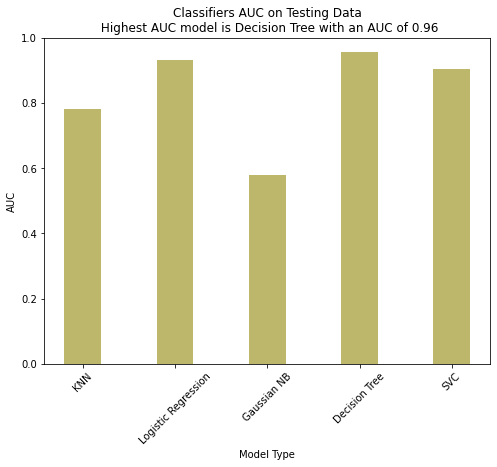

In [ ]:
models_name = np.array(models_name)
models_auc = np.array(models_auc)

max_auc_index = np.argmax(models_auc)
max_auc = models_auc[max_auc_index]
max_auc_model = models_name[max_auc_index]

plt.figure(figsize=(8,6))
plt.bar(models_name, models_auc, width=0.4, color = 'darkkhaki')
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("AUC")
plt.ylim(0, 1)
title = 'Classifiers AUC on Testing Data\n Highest AUC model is {0} with an AUC of {1:.2f}'.format(max_auc_model, max_auc)
plt.title(title)
plt.show()